In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent
import google.generativeai as genai
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv

In [2]:
import sys 
sys.path.append('D:\\Pet Project\\automated_data_analysis_web_using_python_and_genai')
from src.models.llm import load_llm
llm = load_llm('gemini-pro')
llm

ChatGoogleGenerativeAI(model='models/gemini-1.5-pro-002', google_api_key=SecretStr('**********'), temperature=0.0, max_output_tokens=1000, client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x0000027E1C92F0A0>, default_metadata=())

In [3]:
response = llm.invoke('What is Question of the day trivia club?')

In [4]:
print(response)

content='Question of the Day (QOTD) trivia clubs are groups, often online, centered around the daily ritual of asking and answering a trivia question.  They can take many forms, including:\n\n* **Social Media Groups:**  Many QOTD clubs exist on platforms like Facebook, WhatsApp, Discord, or Reddit. Members receive a trivia question each day and can respond with their answers, often sparking discussions and friendly competition.\n* **Email Lists:** Some QOTD clubs operate via email, sending subscribers a daily question.\n* **Dedicated Apps/Websites:** There are apps and websites specifically designed for daily trivia, often with features like leaderboards, streaks, and different categories of questions.\n* **Informal Groups:**  Friends, families, or colleagues might have their own informal QOTD tradition.\n\nThe purpose of these clubs is primarily entertainment and learning. They offer a fun way to test knowledge, learn new facts, and engage with others who share an interest in trivia. 

In [6]:
df = pd.read_csv('D:\\Pet Project\\automated_data_analysis_web_using_python_and_genai\\data\\raw\\clean_data.csv')
da_agent = create_pandas_dataframe_agent(
    llm=llm, 
    df = df,
    agent_type='zero-shot-react-description',
    allow_dangerous_code=True,
    verbose=True, 
    return_intermediate_steps=True
)

In [7]:
da_agent

AgentExecutor(verbose=True, agent=RunnableAgent(runnable=RunnableAssign(mapper={
  agent_scratchpad: RunnableLambda(lambda x: format_log_to_str(x['intermediate_steps']))
})
| PromptTemplate(input_variables=['agent_scratchpad', 'input'], input_types={}, partial_variables={'df_head': '|    |   customer_id |   label |   SHORT_TERM_COUNT |   MID_TERM_COUNT |   LONG_TERM_COUNT |   SHORT_TERM_COUNT_BANK |   MID_TERM_COUNT_BANK |   LONG_TERM_COUNT_BANK |   SHORT_TERM_COUNT_NON_BANK |   MID_TERM_COUNT_NON_BANK |   LONG_TERM_COUNT_NON_BANK |   NUMBER_OF_LOANS |   NUMBER_OF_LOANS_BANK |   NUMBER_OF_LOANS_NON_BANK |   NUMBER_OF_CREDIT_CARDS |   NUMBER_OF_CREDIT_CARDS_BANK |   NUMBER_OF_CREDIT_CARDS_NON_BANK |   NUMBER_OF_RELATIONSHIP |   NUMBER_OF_RELATIONSHIP_BANK |   NUMBER_OF_RELATIONSHIP_NON_BANK |   NUM_NEW_LOAN_TAKEN_3M |   NUM_NEW_LOAN_TAKEN_6M |   NUM_NEW_LOAN_TAKEN_9M |   NUM_NEW_LOAN_TAKEN_12M |   NUM_NEW_LOAN_TAKEN_BANK_3M |   NUM_NEW_LOAN_TAKEN_BANK_6M |   NUM_NEW_LOAN_TAKEN_BANK_9M |

In [8]:
query = 'Describe this data'
response = da_agent(query)

C:\Users\admin\AppData\Local\Temp\ipykernel_7612\4214231101.py:2: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = da_agent(query)




> Entering new AgentExecutor chain...
Thought: I can describe the data by looking at the columns, their data types, and some summary statistics.

Action: python_repl_ast
Action Input: `df.info()`<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10255 entries, 0 to 10254
Columns: 124 entries, customer_id to OUTSTANDING_BAL_ALL_CURRENT
dtypes: float64(122), int64(2)
memory usage: 9.7 MB
Thought: The dataframe has 10255 rows and 124 columns. Most of the columns are float64 type, and two are int64.  I can get some descriptive statistics using `describe`.

Action: python_repl_ast
Action Input: `df.describe()`        customer_id         label  SHORT_TERM_COUNT  MID_TERM_COUNT  \
count  10255.000000  10255.000000      10255.000000    10255.000000   
mean   10059.214042      0.258606          5.666017        3.517016   
std     7614.589416      0.437890          3.844819        3.314313   
min        0.000000      0.000000          1.000000        1.000000   
25%     3449.000000      0.00000



> Entering new AgentExecutor chain...
Thought: To plot a scatter plot of enquiries, I need to decide which enquiry columns to use for the x and y axes. Since there are multiple enquiry columns (3M, 6M, 9M, 12M), I can choose any two for comparison. I'll choose 'ENQUIRIES_3M' for the x-axis and 'ENQUIRIES_6M' for the y-axis.

Action: python_repl_ast
Action Input: 
```python
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(df['ENQUIRIES_3M'], df['ENQUIRIES_6M'], alpha=0.5)
plt.title('Scatter Plot of Enquiries (3M vs 6M)')
plt.xlabel('ENQUIRIES_3M')
plt.ylabel('ENQUIRIES_6M')
plt.grid(True)
plt.show()
```


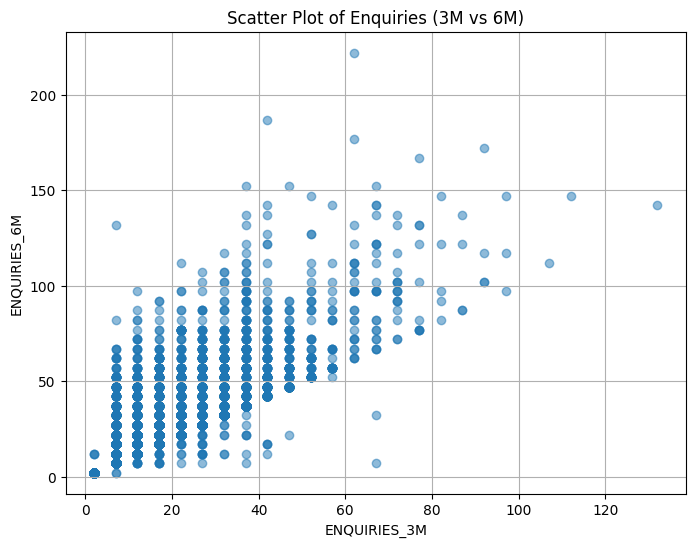

Thought: The code executed successfully and displayed a scatter plot of 'ENQUIRIES_3M' vs. 'ENQUIRIES_6M'.

Final Answer: A scatter plot has been generated showing the relationship between the number of enquiries in the last 3 months (ENQUIRIES_3M) and the number of enquiries in the last 6 months (ENQUIRIES_6M).

> Finished chain.


In [9]:
query = 'plot scatter plot of enquiries'
response = da_agent(query)

In [11]:
query = 'Do you detect any problems from this data?'
response = da_agent(query)



> Entering new AgentExecutor chain...
Thought: I should look for missing values, inconsistencies, and outliers.

Action: python_repl_ast
Action Input: `print(df.describe())`
        customer_id         label  SHORT_TERM_COUNT  MID_TERM_COUNT  \
count  10255.000000  10255.000000      10255.000000    10255.000000   
mean   10059.214042      0.258606          5.666017        3.517016   
std     7614.589416      0.437890          3.844819        3.314313   
min        0.000000      0.000000          1.000000        1.000000   
25%     3449.000000      0.000000          4.000000        1.000000   
50%     8066.000000      0.000000          4.000000        1.000000   
75%    16281.500000      1.000000          7.000000        4.000000   
max    25659.000000      1.000000         22.000000       25.000000   

       LONG_TERM_COUNT  SHORT_TERM_COUNT_BANK  MID_TERM_COUNT_BANK  \
count     10255.000000           10255.000000         10255.000000   
mean          1.081326               3.05480